# Overview

* We will analyze two datasets related to Covid-19, Covid-19 World Vaccination Progress by country and Covid -19 death/cases data by country to try.
* We will perfrom hypothesis test to infere if increased Covid-19 vaccination will result in lower Covid-19 case counts.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Creating df from both the csv files
covid_cases_df = pd.read_csv('Resource/covid-data.csv')
covid_vacc_df = pd.read_csv('Resource/country_vaccinations.csv')


# updating the df to have columns needed for analysis
covid_vacc_df = covid_vacc_df[['country', 'date', 'iso_code', 'people_vaccinated', \
                               'daily_vaccinations', 'people_vaccinated_per_hundred']]

# converting date object to pandas 'datetime64[ns]' format
covid_vacc_df['date'] = pd.to_datetime(covid_vacc_df['date'])

covid_cases_df = covid_cases_df[['location', 'date', 'iso_code', 'total_cases', 'new_cases', \
                                'total_deaths', 'new_deaths', 'population', 'total_cases_per_million', \
                                 'new_cases_per_million']]

# converting date object to pandas 'datetime64[ns]' format
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])


In [4]:
# Adding total cases per hundred column
covid_cases_df['total_cases_per_hundred'] = (covid_cases_df['total_cases'] / covid_cases_df['population']) * 100

# Dropping the row that contatins world data or continental data
covid_cases_df = covid_cases_df[~covid_cases_df['iso_code'].str.contains('OWID')]

covid_cases_df = covid_cases_df.reset_index(drop=True)

In [5]:
# Dropping the row that contatins world data or continental data
covid_vacc_df = covid_vacc_df[~covid_vacc_df['iso_code'].str.contains('OWID')]

In [6]:
# Grouped max vaccination DF on country
max_covid_vacc_df = covid_vacc_df.groupby(['iso_code'], as_index=False).max().\
                        sort_values(by=['people_vaccinated_per_hundred'], ascending=False).reset_index(drop=True)
max_covid_vacc_df

,iso_code,country,date,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,GIB,Gibraltar,2022-03-24,42034.0,1068.0,124.76
1,NIU,Niue,2022-03-13,1650.0,87.0,102.23
2,PCN,Pitcairn,2021-09-07,47.0,1.0,100.00
3,ARE,United Arab Emirates,2022-03-29,9890318.0,155312.0,98.99
4,PRT,Portugal,2022-03-10,9663542.0,150867.0,95.04
...,...,...,...,...,...,...
212,YEM,Yemen,2022-03-16,643501.0,10240.0,2.11
213,TCD,Chad,2022-03-18,282003.0,4722.0,1.67
214,HTI,Haiti,2022-03-23,163710.0,5695.0,1.42
215,COD,Democratic Republic of Congo,2022-03-24,853971.0,25961.0,0.92


In [7]:
covid_cases_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred
0,Afghanistan,2020-02-24,AFG,5.0,5.0,NaN,NaN,39835428.0,0.126,0.126,0.000013
1,Afghanistan,2020-02-25,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
2,Afghanistan,2020-02-26,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
3,Afghanistan,2020-02-27,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
4,Afghanistan,2020-02-28,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
...,...,...,...,...,...,...,...,...,...,...,...
155326,Zimbabwe,2022-03-01,ZWE,236871.0,491.0,5395.0,0.0,15092171.0,15694.959,32.533,1.569496
155327,Zimbabwe,2022-03-02,ZWE,237503.0,632.0,5396.0,1.0,15092171.0,15736.835,41.876,1.573683
155328,Zimbabwe,2022-03-03,ZWE,237503.0,0.0,5396.0,0.0,15092171.0,15736.835,0.000,1.573683
155329,Zimbabwe,2022-03-04,ZWE,238739.0,1236.0,5397.0,1.0,15092171.0,15818.731,81.897,1.581873


In [8]:
covid_vacc_df.head(395)

,country,date,iso_code,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,Afghanistan,2021-02-22,AFG,0.0,NaN,0.00
1,Afghanistan,2021-02-23,AFG,NaN,1367.0,NaN
2,Afghanistan,2021-02-24,AFG,NaN,1367.0,NaN
3,Afghanistan,2021-02-25,AFG,NaN,1367.0,NaN
4,Afghanistan,2021-02-26,AFG,NaN,1367.0,NaN
...,...,...,...,...,...,...
390,Afghanistan,2022-03-19,AFG,NaN,9838.0,NaN
391,Afghanistan,2022-03-20,AFG,NaN,8665.0,NaN
392,Afghanistan,2022-03-21,AFG,NaN,7492.0,NaN
393,Afghanistan,2022-03-22,AFG,5082824.0,6319.0,12.76


In [9]:
# Grouped max covid cases DF on country
# Sorting the DF based on total cases per hundred
# Dropping the rows with NAN values for total cases and resetting the index

max_covid_case_df = covid_cases_df.groupby(['iso_code'], as_index=False).max()

sort_covid_case_per_hund_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases_per_hundred'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)


# Sorting the DF based on total cases
sort_most_covid_case_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)

In [10]:
# This df shows the most effected countries based on cases per hundred. 
sort_covid_case_per_hund_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,FRO,Faeroe Islands,2022-03-05,34658.0,28.0,4.905300e+04,706541.904,70.654190
1,AND,Andorra,2022-03-05,38434.0,151.0,7.735400e+04,496858.598,49.685860
2,DNK,Denmark,2022-03-05,2853236.0,4830.0,5.813302e+06,490811.590,49.081159
3,GIB,Gibraltar,2022-03-05,15622.0,101.0,3.369100e+04,463684.664,46.368466
4,SVN,Slovenia,2022-03-05,902744.0,6351.0,2.078723e+06,434278.160,43.427816
...,...,...,...,...,...,...,...,...
209,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
210,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382
211,CHN,China,2022-03-05,110868.0,4654.0,1.444216e+09,76.767,0.007677
212,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042


In [11]:
# This df shows the most effected countries based on most number of total cases. 
sort_most_covid_case_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,USA,United States,2022-03-05,79265726.0,958437.0,3.329151e+08,238095.936,23.809594
1,IND,India,2022-03-05,42962953.0,515036.0,1.393409e+09,30832.980,3.083298
2,BRA,Brazil,2022-03-05,29040800.0,652216.0,2.139934e+08,135708.832,13.570883
3,FRA,France,2022-03-05,23064766.0,139312.0,6.742200e+07,342095.547,34.209555
4,GBR,United Kingdom,2022-03-05,19172095.0,162152.0,6.820711e+07,281086.442,28.108644
...,...,...,...,...,...,...,...,...
209,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042
210,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
211,SHN,Saint Helena,2022-03-05,4.0,NaN,6.095000e+03,656.276,0.065628
212,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382


In [12]:
#mergin two dfs on 'iso-code' and 'date'

merge_df = pd.merge(covid_cases_df, covid_vacc_df, on=['iso_code', 'date'], how='outer')

In [13]:
#verfying the merge df

merge_df.loc[(merge_df['iso_code'] == 'AFG') & (merge_df['date'] == '2022-03-22')]

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
155347,NaN,2022-03-22,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,5082824.0,6319.0,12.76


In [14]:
# Dataframes available to use

#1. covid_vacc_df  ---- raw df with required columns for vaccination record
#2. covid_cases_df ---- raw df with required columns for cases record with added column for "total cases per hundred"
                        # plus data for world and continents are removed from it
    
#3. max_covid_vacc_df ---- data is grouped on country and is sorted with the countries with most people vaccinated
#4. sort_covid_case_per_hund_df ---- data is grouped on country and is sorted with the countries with most cases per hundred
#5. sort_most_covid_case_df ---- data is grouped on country and is sorted with the countries with most cases
#6. merge_df ---- its a merged df 'on=['iso_code', 'date']' containg vaccination and cases record. 




Daily Vaccinations vs. New Cases Over Time

In [15]:
large_countries_df = merge_df.loc[(merge_df['population'] > 47000000), :]
large_countries_df['location'].unique()

array(['Bangladesh', 'Brazil', 'China', 'Colombia',
       'Democratic Republic of Congo', 'Egypt', 'Ethiopia', 'France',
       'Germany', 'India', 'Indonesia', 'Iran', 'Italy', 'Japan', 'Kenya',
       'Mexico', 'Myanmar', 'Nigeria', 'Pakistan', 'Philippines',
       'Russia', 'South Africa', 'South Korea', 'Tanzania', 'Thailand',
       'Turkey', 'Uganda', 'United Kingdom', 'United States', 'Vietnam'],
      dtype=object)

In [16]:
sorted_large_df = large_countries_df.groupby(['country'], as_index=False).max().sort_values(by=['people_vaccinated_per_hundred'], ascending=False)


In [17]:
#Find top countries for 'people_vaccinated_per_hundred' 
sorted_large_df.head(3)

,country,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
2,China,China,2022-03-05,CHN,110868.0,361.0,4654.0,18.0,1.444216e+09,76.767,0.250,0.007677,1.269302e+09,22424286.0,87.89
22,South Korea,South Korea,2022-03-05,KOR,4456264.0,266838.0,8957.0,216.0,5.130518e+07,86857.967,5200.995,8.685797,4.488254e+07,880695.0,87.48
12,Italy,Italy,2022-03-05,ITA,12990223.0,228123.0,155782.0,718.0,6.036747e+07,215185.808,3778.906,21.518581,5.065603e+07,665762.0,83.91


In [18]:
#Find top countries for 'people_vaccinated_per_hundred' 
sorted_large_df.tail(3)

,country,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
17,Nigeria,Nigeria,2022-03-05,NGA,254637.0,6158.0,3142.0,93.0,211400704.0,1204.523,29.130,0.120452,17735985.0,286036.0,8.39
23,Tanzania,Tanzania,2022-03-05,TZA,33620.0,24307.0,798.0,669.0,61498438.0,546.681,395.246,0.054668,3223953.0,36892.0,5.24
4,Democratic Republic of Congo,Democratic Republic of Congo,2022-03-05,COD,86154.0,4481.0,1335.0,79.0,92377986.0,932.625,48.507,0.093262,754459.0,25961.0,0.82


In [19]:
#Create country dataframes
country1_df = large_countries_df.loc[large_countries_df['iso_code'] == 'CHN']
country2_df = large_countries_df.loc[large_countries_df['iso_code'] == 'KOR']
country3_df = large_countries_df.loc[large_countries_df['iso_code'] == 'ITA']
country4_df = large_countries_df.loc[large_countries_df['iso_code'] == 'NGA']
country5_df = large_countries_df.loc[large_countries_df['iso_code'] == 'TZA']
country6_df = large_countries_df.loc[large_countries_df['iso_code'] == 'COD']
usa_df = large_countries_df.loc[large_countries_df['iso_code'] == 'USA']
BRA_df = large_countries_df.loc[large_countries_df['iso_code'] == 'BRA']

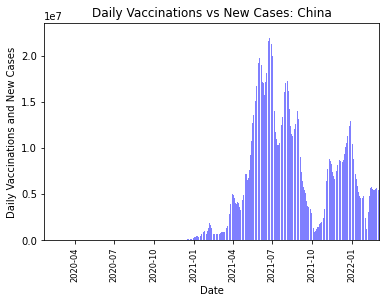

In [21]:
#Create Bar Chart for China
plt.bar(country1_df['date'], country1_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country1_df['date'], country1_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country1_df['date'].min(), country1_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: China")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

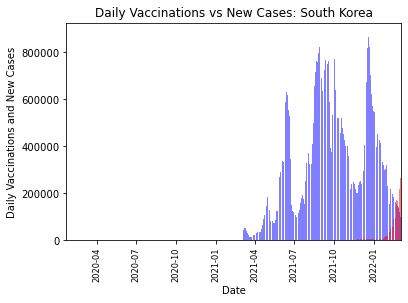

In [22]:
#Create Bar Chart for South Korea
plt.bar(country2_df['date'], country2_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country2_df['date'], country2_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country2_df['date'].min(), country2_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: South Korea")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

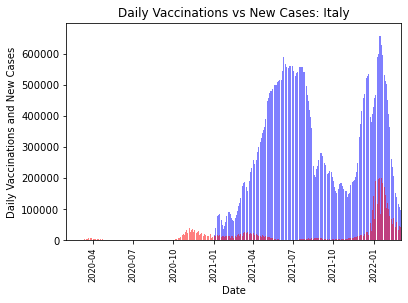

In [23]:
#Create Bar Chart for Italy
plt.bar(country3_df['date'], country3_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country3_df['date'], country3_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country3_df['date'].min(), country3_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Italy")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

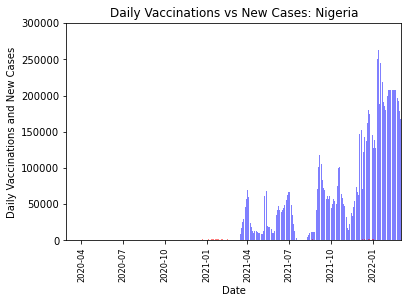

In [24]:
#Create Bar Chart for Nigeria
plt.bar(country4_df['date'], country4_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country4_df['date'], country4_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country4_df['date'].min(), country4_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Nigeria")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

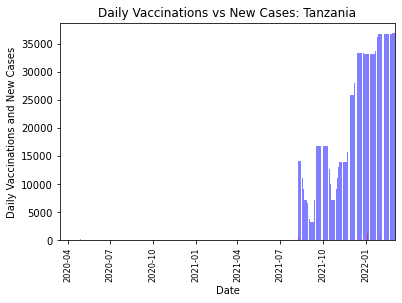

In [25]:
#Create Bar Chart for Tanzania
plt.bar(country5_df['date'], country5_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country5_df['date'], country5_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country5_df['date'].min(), country5_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Tanzania")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

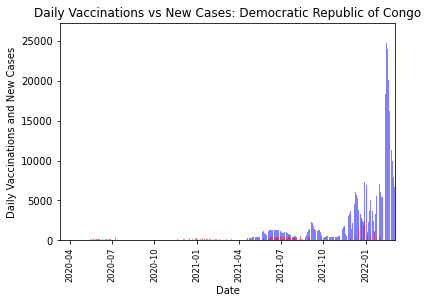

In [26]:
#Create Bar Chart for DRC
plt.bar(country6_df['date'], country6_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country6_df['date'], country6_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country6_df['date'].min(), country6_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Democratic Republic of Congo")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

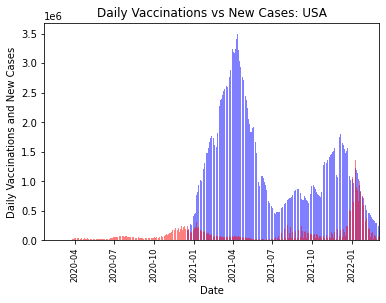

In [27]:
#Create Bar Chart for USA
plt.bar(usa_df['date'], usa_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(usa_df['date'], usa_df['new_cases'], color='r', alpha=0.5)
plt.xlim(usa_df['date'].min(), usa_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: USA")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()

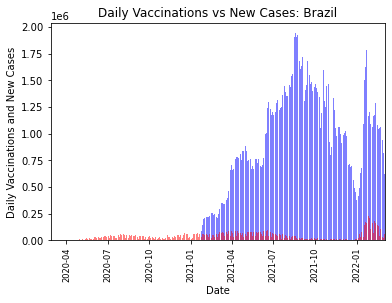

In [28]:
#Create Bar Chart for Brazil
plt.bar(BRA_df['date'], BRA_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(BRA_df['date'], BRA_df['new_cases'], color='r', alpha=0.5)
plt.xlim(BRA_df['date'].min(), BRA_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Brazil")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.show()